In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils.analysis import get_scaled_weights

In [3]:
import matplotlib as mpl
mpl.rcParams['axes.formatter.limits'] = (-3,3)

In [4]:
mH_bins = easy_bins['mH']
score_bins = easy_bins['score']

In [5]:
import awkward as ak
import numpy as np
np.seterr(all="ignore")
import uproot

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.lines as lines
import matplotlib.patches as patches

In [7]:
def x_bins(bins):
    return (bins[:-1] + bins[1:])/2

In [8]:
f = uproot.open("/eos/uscms/store/user/srosenzw/DataMC/SR/JetHT_Data_UL/ntuple.root")

In [9]:
signal_tree = Tree(NMSSM_MX_700_MY_400)
bkgd_tree = Tree(QCD_B_List + [TTJets])
data_tree = Tree(JetHT_Data_UL)

In [ ]:
def get_cr_mass_mask(mass, cut):
    cr_mask = abs(mass - 125) > cut
    sr_mask = abs(mass - 125) >= cut
    return sr_mask, cr_mask

In [10]:
# cr_sgnl_mask = ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1)
cr_sgnl_mask = abs(signal_tree.t6_higgs_m[:,2] - 125) > 60
sr_sgnl_mask = abs(signal_tree.t6_higgs_m[:,2] - 125) < 60
# cr_data_mask = ak.all(abs(data_tree.t6_higgs_m - 125) > 60, axis=1)
cr_data_mask = abs(data_tree.t6_higgs_m[:,2] - 125) > 60
cr_bkgd_mask = [abs(higgs_m[:,2] - 125) > 60 for higgs_m in bkgd_tree.t6_higgs_m]

In [11]:
print(f"Fraction of signal events in CR: {ak.sum(cr_sgnl_mask)/len(cr_sgnl_mask):.3f}")
print(f"Fraction of data events in CR: {ak.sum(cr_data_mask)/len(cr_data_mask):.3f}")

Fraction of signal events in CR: 0.169
Fraction of data events in CR: 0.303


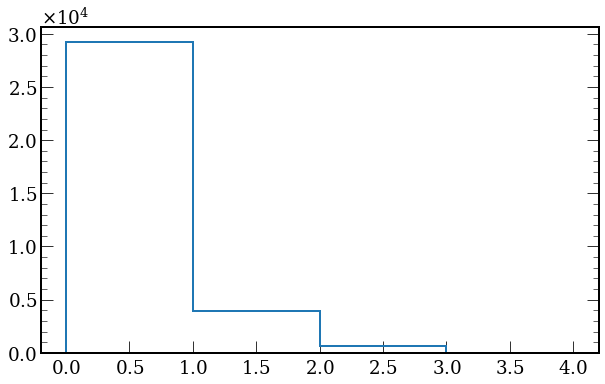

In [31]:
n, edges = Hist(signal_tree.nfound_t6_h[cr_sgnl_mask], bins=np.arange(5))

In [17]:
bkgd_t6_mH1 = [mH[:,0][mask] for mH,mask in zip(bkgd_tree.t6_higgs_m, cr_bkgd_mask)]
bkgd_t6_mH2 = [mH[:,1][mask] for mH,mask in zip(bkgd_tree.t6_higgs_m, cr_bkgd_mask)]
bkgd_t6_mH3 = [mH[:,2][mask] for mH,mask in zip(bkgd_tree.t6_higgs_m, cr_bkgd_mask)]

In [18]:
bkgd_t6_mH1_all = [mH[:,0] for mH in bkgd_tree.t6_higgs_m]
bkgd_t6_mH2_all = [mH[:,1] for mH in bkgd_tree.t6_higgs_m]
bkgd_t6_mH3_all = [mH[:,2] for mH in bkgd_tree.t6_higgs_m]

In [34]:
def to_perc(num, denom):
    print(f"{int(ak.sum(num)/ak.sum(denom)*100)}%")

In [35]:
n_CR, b, x = get_scaled_weights(bkgd_t6_mH1, bins=np.linspace(0,1000,1000), scale=bkgd_tree.scale)
n_all, b, x = get_scaled_weights(bkgd_t6_mH1_all, bins=np.linspace(0,1000,1000), scale=bkgd_tree.scale)
to_perc(n_CR, n_all)

27%


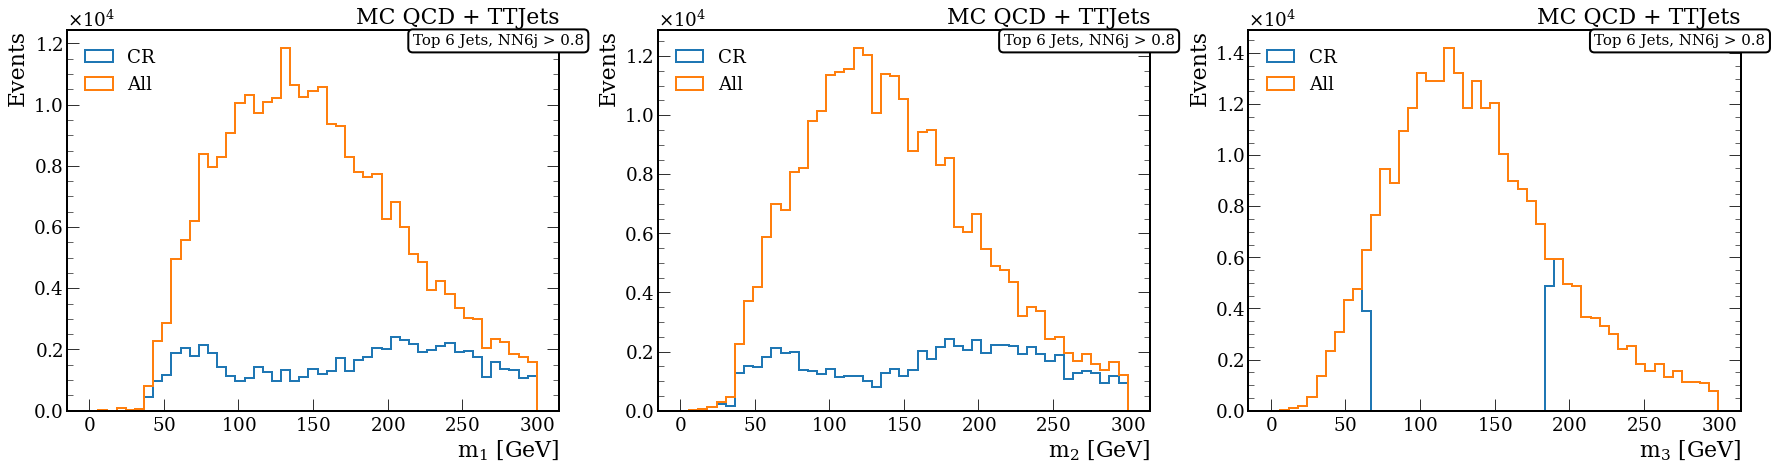

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,7))

ax = axs[0]
n, b, x = get_scaled_weights(bkgd_t6_mH1, bins=mH_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='CR')
n, b, x = get_scaled_weights(bkgd_t6_mH1_all, bins=mH_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='All')
# n_data, edges = Hist(data_tree.t6_higgs_m[:,0], bins=b, ax=ax, label='Data', color='black')
ax.legend(loc=2, fontsize='smaller')
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, .99, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
ax.set_title('MC QCD + TTJets', loc='right')
# ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)
# ax = axs[1][0]
# ax.plot([0,300],[1,1], '--', color='grey', lw=1)
# ratio = np.where(n_mc != 0, n_data/n_mc, 0)
# n, edges = Hist(x, weights=ratio, bins=mH_bins, ax=ax)
# RATIO = ratio
ax.set_xlabel(r'$m_1$ [GeV]')
ax.set_ylabel('Events')

ax = axs[1]
n, b, x = get_scaled_weights(bkgd_t6_mH2, bins=mH_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='CR')
n, b, x = get_scaled_weights(bkgd_t6_mH2_all, bins=mH_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='All')
# n_data, edges = Hist(data_tree.t6_higgs_m[:,1], bins=b, ax=ax, label='Data', color='black')
ax.legend(loc=2, fontsize='smaller')
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, .99, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
ax.set_title('MC QCD + TTJets', loc='right')
# ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)
# ax = axs[1][1]
# ax.plot([0,300],[1,1], '--', color='grey', lw=1)
# ratio = np.where(n_mc != 0, n_data/n_mc, 0)
# n, edges = Hist(x, weights=ratio, bins=mH_bins, ax=ax)
ax.set_xlabel(r'$m_2$ [GeV]')
ax.set_ylabel('Events')

ax = axs[2]
n, b, x = get_scaled_weights(bkgd_t6_mH3, bins=mH_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='CR')
n, b, x = get_scaled_weights(bkgd_t6_mH3_all, bins=mH_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='All')
# n_data, edges = Hist(data_tree.t6_higgs_m[:,2], bins=b, ax=ax, label='Data', color='black')
ax.legend(loc=2, fontsize='smaller')
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, .99, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
ax.set_title('MC QCD + TTJets', loc='right')
# ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)
# ax = axs[1][2]
# ax.plot([0,300],[1,1], '--', color='grey', lw=1)
# ratio = np.where(n_mc != 0, n_data/n_mc, 0)
# n, edges = Hist(x, weights=ratio, bins=mH_bins, ax=ax)
ax.set_xlabel(r'$m_3$ [GeV]')
ax.set_ylabel('Events')

fig.savefig('plots/data_MCbkgd/MC_all_event_dist.pdf')

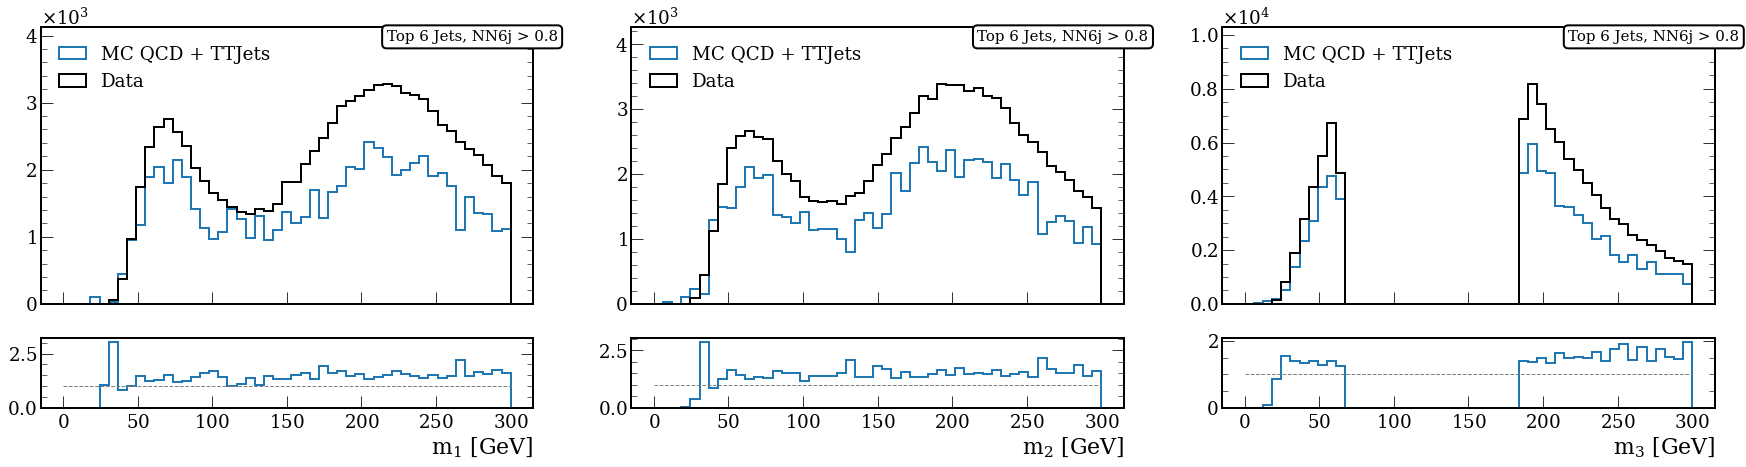

In [29]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30,7), sharex=True, gridspec_kw={'height_ratios':[4,1]})

ax = axs[0][0]
n, b, x = get_scaled_weights(bkgd_t6_mH1, bins=mH_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.t6_higgs_m[:,0][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(loc=2, fontsize='smaller')
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, .99, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
# ax.set_title(signal_tree.sample, loc='right')
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)
ax = axs[1][0]
ax.plot([0,300],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=mH_bins, ax=ax)
RATIO = ratio
ax.set_xlabel(r'$m_1$ [GeV]')

ax = axs[0][1]
n, b, x = get_scaled_weights(bkgd_t6_mH2, bins=mH_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.t6_higgs_m[:,1][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(loc=2, fontsize='smaller')
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, .99, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
# ax.set_title(signal_tree.sample, loc='right')
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)
ax = axs[1][1]
ax.plot([0,300],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=mH_bins, ax=ax)
ax.set_xlabel(r'$m_2$ [GeV]')

ax = axs[0][2]
n, b, x = get_scaled_weights(bkgd_t6_mH3, bins=mH_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.t6_higgs_m[:,2][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(loc=2, fontsize='smaller')
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, .99, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
# ax.set_title(signal_tree.sample, loc='right')
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)
ax = axs[1][2]
ax.plot([0,300],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=mH_bins, ax=ax)
ax.set_xlabel(r'$m_3$ [GeV]')

fig.savefig('plots/data_MCbkgd/one_veto_CR.pdf')

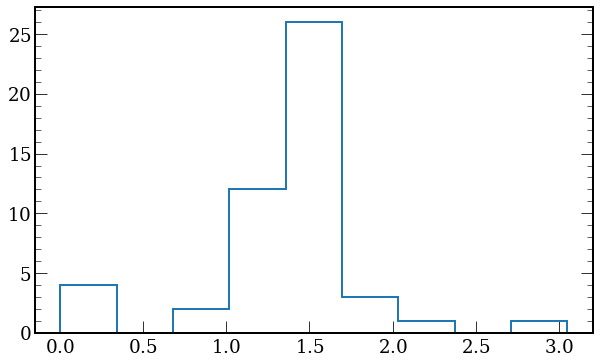

In [92]:
_ = Hist(RATIO, bins=np.linspace(RATIO.min(), RATIO.max(), 10))

In [93]:
n_bins = np.arange(8)

In [98]:
bkgd_t6_tight  = [n_tight[mask] for n_tight,mask in zip(bkgd_tree.ntight_btag, cr_bkgd_mask)]
bkgd_t6_medium = [n_med[mask] for n_tight,n_med,mask in zip(bkgd_tree.ntight_btag, bkgd_tree.nmedium_btag, cr_bkgd_mask)]
bkgd_t6_loose  = [n_loose[mask] for n_tight,n_med,n_loose,mask in zip(bkgd_tree.ntight_btag, bkgd_tree.nmedium_btag, bkgd_tree.nloose_btag, cr_bkgd_mask)]

Text(1, 0, '$n_\\mathrm{loose}$')

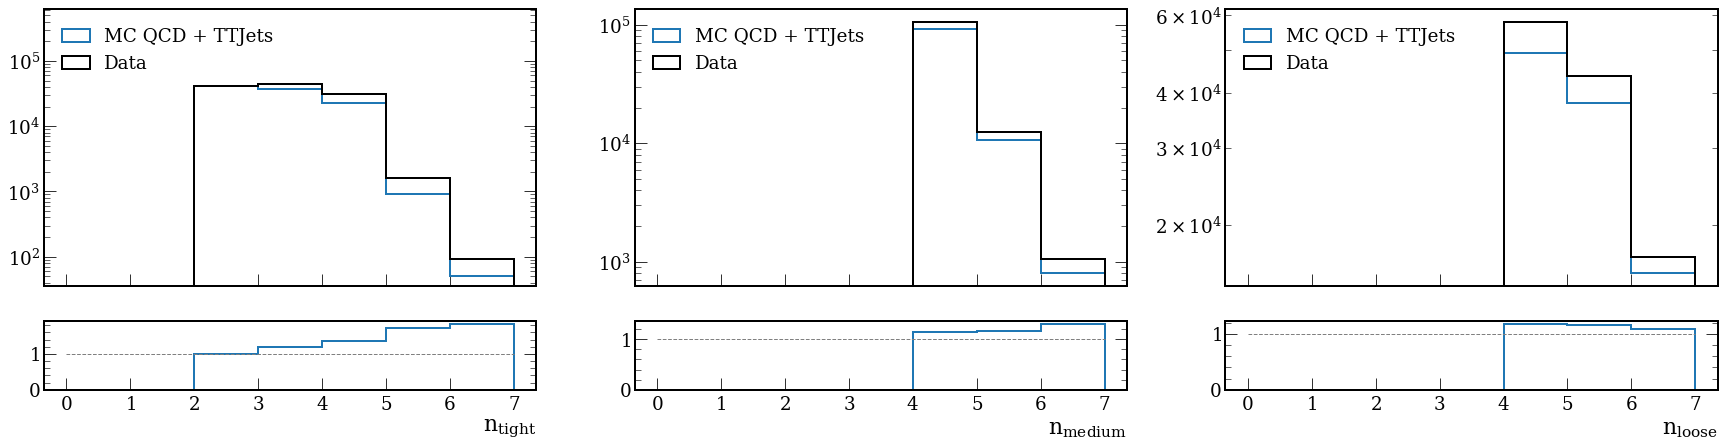

In [99]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30,7), sharex=True, gridspec_kw={'height_ratios':[4,1]})

ax = axs[0][0]
n, b, x = get_scaled_weights(bkgd_t6_tight, bins=n_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.ntight_btag[cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller', loc=2)
ax.set_yscale('log')
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*10)
ax = axs[1][0]
ax.plot([0,7],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=n_bins, ax=ax)
ax.set_xlabel(r'$n_\mathrm{tight}$')

ax = axs[0][1]
n, b, x = get_scaled_weights(bkgd_t6_medium, bins=n_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.nmedium_btag[cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller', loc=2)
ax.set_yscale('log')
ax = axs[1][1]
ax.plot([0,7],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=n_bins, ax=ax)
ax.set_xlabel(r'$n_\mathrm{medium}$')

ax = axs[0][2]
n, b, x = get_scaled_weights(bkgd_t6_loose, bins=n_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.nloose_btag[cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller', loc=2)
ax.set_yscale('log')
ax = axs[1][2]
ax.plot([0,7],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=n_bins, ax=ax)
ax.set_xlabel(r'$n_\mathrm{loose}$')

In [96]:
bkgd_t6_tight  = [n_tight[mask] for n_tight,mask in zip(bkgd_tree.ntight_btag, cr_bkgd_mask)]
bkgd_t6_medium = [(n_med-n_tight)[mask] for n_tight,n_med,mask in zip(bkgd_tree.ntight_btag, bkgd_tree.nmedium_btag, cr_bkgd_mask)]
bkgd_t6_loose  = [(n_loose - n_tight - (n_med-n_tight))[mask] for n_tight,n_med,n_loose,mask in zip(bkgd_tree.ntight_btag, bkgd_tree.nmedium_btag, bkgd_tree.nloose_btag, cr_bkgd_mask)]

Text(1, 0, '$n_\\mathrm{loose}$')

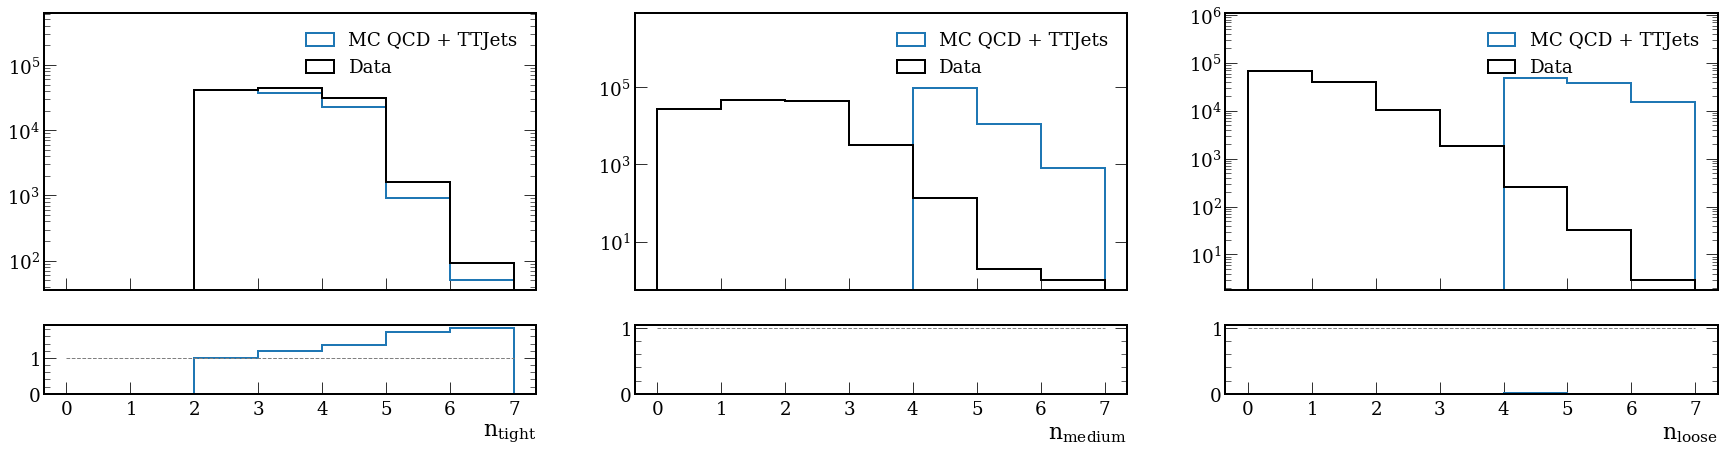

In [102]:
# fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30,7), sharex=True, gridspec_kw={'height_ratios':[4,1]})
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30,7), sharex=True, gridspec_kw={'height_ratios':[4,1]})

ax = axs[0][0]
n, b, x = get_scaled_weights(bkgd_t6_tight, bins=n_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.ntight_btag[cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.set_yscale('log')
ax.legend(fontsize='smaller')
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*10)
ax = axs[1][0]
ax.plot([0,7],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=n_bins, ax=ax)
ax.set_xlabel(r'$n_\mathrm{tight}$')

ax = axs[0][1]
n, b, x = get_scaled_weights(bkgd_t6_medium, bins=n_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist((data_tree.nmedium_btag-data_tree.ntight_btag)[cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller')
ax.set_yscale('log')
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*50)
ax = axs[1][1]
ax.plot([0,7],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=n_bins, ax=ax)
ax.set_xlabel(r'$n_\mathrm{medium}$')

ax = axs[0][2]
n, b, x = get_scaled_weights(bkgd_t6_loose, bins=n_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist((data_tree.nloose_btag - data_tree.ntight_btag - (data_tree.nmedium_btag-data_tree.ntight_btag))[cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller')
ax.set_yscale('log')
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*10)
ax = axs[1][2]
ax.plot([0,7],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=n_bins, ax=ax)
ax.set_xlabel(r'$n_\mathrm{loose}$')

In [66]:
bkgd_t6_btag1 = [btag[:,0][mask] for btag,mask in zip(bkgd_tree.t6_jet_btag, cr_bkgd_mask)]
bkgd_t6_btag2 = [btag[:,1][mask] for btag,mask in zip(bkgd_tree.t6_jet_btag, cr_bkgd_mask)]
bkgd_t6_btag3 = [btag[:,2][mask] for btag,mask in zip(bkgd_tree.t6_jet_btag, cr_bkgd_mask)]
bkgd_t6_btag4 = [btag[:,3][mask] for btag,mask in zip(bkgd_tree.t6_jet_btag, cr_bkgd_mask)]
bkgd_t6_btag5 = [btag[:,4][mask] for btag,mask in zip(bkgd_tree.t6_jet_btag, cr_bkgd_mask)]
bkgd_t6_btag6 = [btag[:,5][mask] for btag,mask in zip(bkgd_tree.t6_jet_btag, cr_bkgd_mask)]

In [12]:
from matplotlib import gridspec

Text(1, 0, '$\\mathrm{btag}_{6}$')

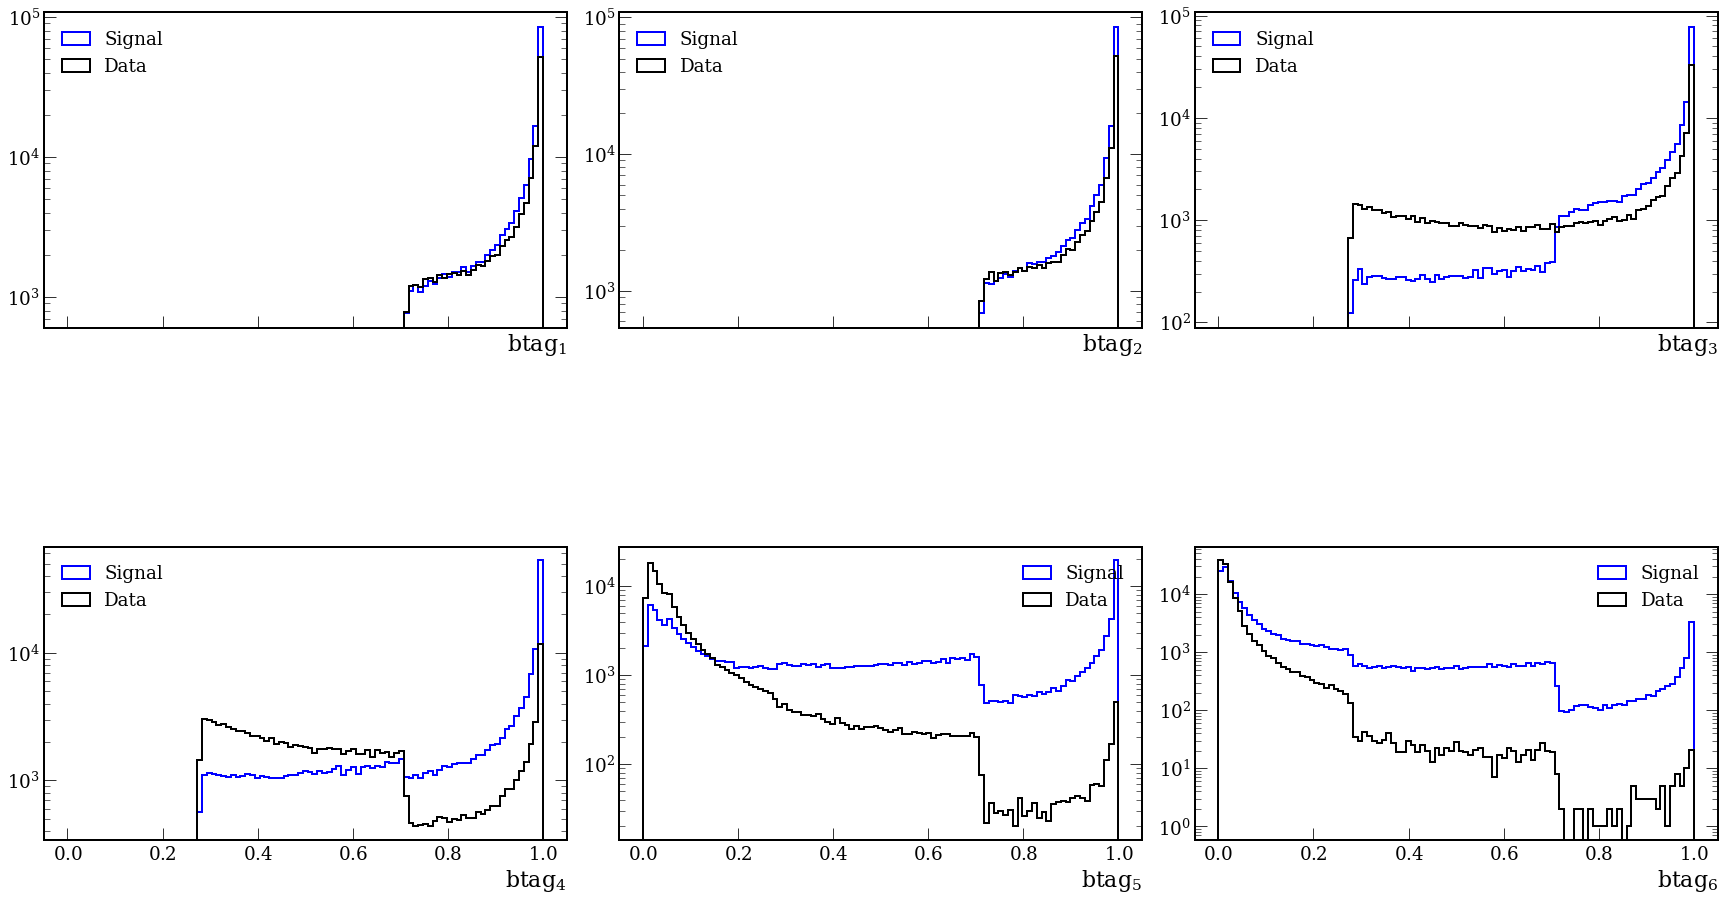

In [16]:
b = score_bins

fig = plt.figure(figsize=(30,14))
spec1 = gridspec.GridSpec(nrows=2, ncols=3,
                         height_ratios=[4, 1])
spec1.update(top=0.98, bottom=0.55, wspace=0.1)
spec2 = gridspec.GridSpec(nrows=2, ncols=3,
                         height_ratios=[4, 1])
spec2.update(top=0.45, bottom=0.05, wspace=0.1)

ax = fig.add_subplot(spec1[0])
# n, b, x = get_scaled_weights(bkgd_t6_btag1, bins=score_bins, scale=bkgd_tree.scale)
# n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(signal_tree.t6_jet_btag[:,0][sr_sgnl_mask], bins=b, ax=ax, label='Signal', color='blue')
n_data, edges = Hist(data_tree.t6_jet_btag[:,0][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller', loc=2)
ax.set_yscale('log')
ax.xaxis.set_tick_params(labelbottom=False)

# ax = fig.add_subplot(spec1[3], sharex=ax)
# ax.plot([0,1],[1,1], '--', color='grey', lw=1)
# ratio = np.where(n_mc != 0, n_data/n_mc, 0)
# n, edges = Hist(x, weights=ratio, bins=score_bins, ax=ax)
ax.set_xlabel(r'$\mathrm{btag}_{1}$')

ax = fig.add_subplot(spec1[1])
# n, b, x = get_scaled_weights(bkgd_t6_btag2, bins=score_bins, scale=bkgd_tree.scale)
# n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(signal_tree.t6_jet_btag[:,1][sr_sgnl_mask], bins=b, ax=ax, label='Signal', color='blue')
n_data, edges = Hist(data_tree.t6_jet_btag[:,1][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller', loc=2)
ax.set_yscale('log')
ax.xaxis.set_tick_params(labelbottom=False)

# ax = fig.add_subplot(spec1[4], sharex=ax)
# ax.plot([0,1],[1,1], '--', color='grey', lw=1)
# ratio = np.where(n_mc != 0, n_data/n_mc, 0)
# n, edges = Hist(x, weights=ratio, bins=score_bins, ax=ax)
ax.set_xlabel(r'$\mathrm{btag}_{2}$')


ax = fig.add_subplot(spec1[2])
# n, b, x = get_scaled_weights(bkgd_t6_btag3, bins=score_bins, scale=bkgd_tree.scale)
# n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(signal_tree.t6_jet_btag[:,2][sr_sgnl_mask], bins=b, ax=ax, label='Signal', color='blue')
n_data, edges = Hist(data_tree.t6_jet_btag[:,2][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller', loc=2)
ax.set_yscale('log')
ax.xaxis.set_tick_params(labelbottom=False)

# ax = fig.add_subplot(spec1[5], sharex=ax)
# ax.plot([0,1],[1,1], '--', color='grey', lw=1)
# ratio = np.where(n_mc != 0, n_data/n_mc, 0)
# n, edges = Hist(x, weights=ratio, bins=score_bins, ax=ax)
ax.set_xlabel(r'$\mathrm{btag}_{3}$')


ax = fig.add_subplot(spec2[0])
# n, b, x = get_scaled_weights(bkgd_t6_btag4, bins=score_bins, scale=bkgd_tree.scale)
# n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(signal_tree.t6_jet_btag[:,3][sr_sgnl_mask], bins=b, ax=ax, label='Signal', color='blue')
n_data, edges = Hist(data_tree.t6_jet_btag[:,3][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller', loc=2)
ax.set_yscale('log')
# ax = fig.add_subplot(spec2[3], sharex=ax)
# ax.plot([0,1],[1,1], '--', color='grey', lw=1)
# ratio = np.where(n_mc != 0, n_data/n_mc, 0)
# n, edges = Hist(x, weights=ratio, bins=score_bins, ax=ax)
ax.set_xlabel(r'$\mathrm{btag}_{4}$')

ax = fig.add_subplot(spec2[1])
# n, b, x = get_scaled_weights(bkgd_t6_btag5, bins=score_bins, scale=bkgd_tree.scale)
# n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(signal_tree.t6_jet_btag[:,4][sr_sgnl_mask], bins=b, ax=ax, label='Signal', color='blue')
n_data, edges = Hist(data_tree.t6_jet_btag[:,4][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller')
ax.set_yscale('log')
# ax = fig.add_subplot(spec2[4], sharex=ax)
# ax.plot([0,1],[1,1], '--', color='grey', lw=1)
# ratio = np.where(n_mc != 0, n_data/n_mc, 0)
# n, edges = Hist(x, weights=ratio, bins=score_bins, ax=ax)
ax.set_xlabel(r'$\mathrm{btag}_{5}$')

ax = fig.add_subplot(spec2[2])
# n, b, x = get_scaled_weights(bkgd_t6_btag6, bins=score_bins, scale=bkgd_tree.scale)
# n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(signal_tree.t6_jet_btag[:,5][sr_sgnl_mask], bins=b, ax=ax, label='Signal', color='blue')
n_data, edges = Hist(data_tree.t6_jet_btag[:,5][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller')
ax.set_yscale('log')
# ax = fig.add_subplot(spec2[5], sharex=ax)
# ax.plot([0,1],[1,1], '--', color='grey', lw=1)
# ratio = np.where(n_mc != 0, n_data/n_mc, 0)
# n, edges = Hist(x, weights=ratio, bins=score_bins, ax=ax)
ax.set_xlabel(r'$\mathrm{btag}_{6}$')

In [69]:
bkgd_t6_btagsum3 = [ak.sum(btag[:,:3][mask], axis=1)/3 for btag,mask in zip(bkgd_tree.t6_jet_btag, cr_bkgd_mask)]
bkgd_t6_btagsum4 = [ak.sum(btag[:,:4][mask], axis=1)/4 for btag,mask in zip(bkgd_tree.t6_jet_btag, cr_bkgd_mask)]
bkgd_t6_btagsum5 = [ak.sum(btag[:,:5][mask], axis=1)/5 for btag,mask in zip(bkgd_tree.t6_jet_btag, cr_bkgd_mask)]
bkgd_t6_btagsum6 = [ak.sum(btag[mask], axis=1)/6 for btag,mask in zip(bkgd_tree.t6_jet_btag, cr_bkgd_mask)]

0.99951171875


Text(1, 0, 'Sum 6 btag score')

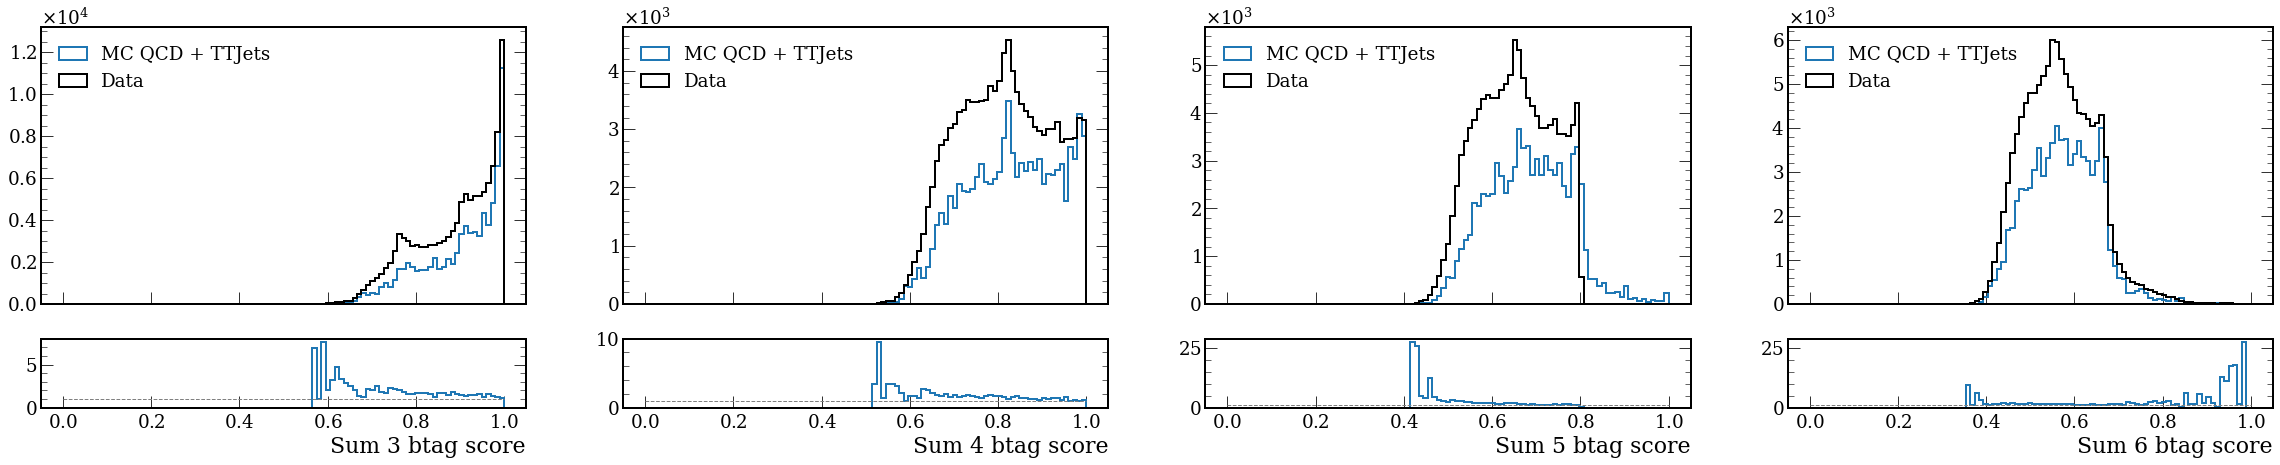

In [109]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(40,7), sharex='col', gridspec_kw={'height_ratios':[4,1]})

bins = np.linspace(0,1,100)
ax = axs[0][0]
n, b, x = get_scaled_weights(bkgd_t6_btagsum3, bins=bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(ak.sum(data_tree.t6_jet_btag[:,:3], axis=1)[cr_data_mask]/3, bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller', loc=2)

ax = axs[1][0]
ax.plot([0,1],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=bins, ax=ax)
ax.set_xlabel(r'Sum 3 btag score')

ax = axs[0][1]
n, b, x = get_scaled_weights(bkgd_t6_btagsum4, bins=bins, scale=bkgd_tree.scale)
print(ak.max(bkgd_t6_btagsum4))
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(ak.sum(data_tree.t6_jet_btag[:,:4], axis=1)[cr_data_mask]/4, bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller', loc=2)

ax = axs[1][1]
ax.plot([0,1],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=bins, ax=ax)
ax.set_xlabel(r'Sum 4 btag score')

ax = axs[0][2]
n, b, x = get_scaled_weights(bkgd_t6_btagsum5, bins=bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(ak.sum(data_tree.t6_jet_btag[:,:4], axis=1)[cr_data_mask]/5, bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller', loc=2)

ax = axs[1][2]
ax.plot([0,1],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=bins, ax=ax)
ax.set_xlabel(r'Sum 5 btag score')

ax = axs[0][3]
n, b, x = get_scaled_weights(bkgd_t6_btagsum6, bins=bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(ak.sum(data_tree.t6_jet_btag, axis=1)[cr_data_mask]/6, bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller', loc=2)

ax = axs[1][3]
ax.plot([0,1],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=bins, ax=ax)
ax.set_xlabel(r'Sum 6 btag score')

In [ ]:
score_bins = np.linspace(0,1,101)

0.10875222911087266


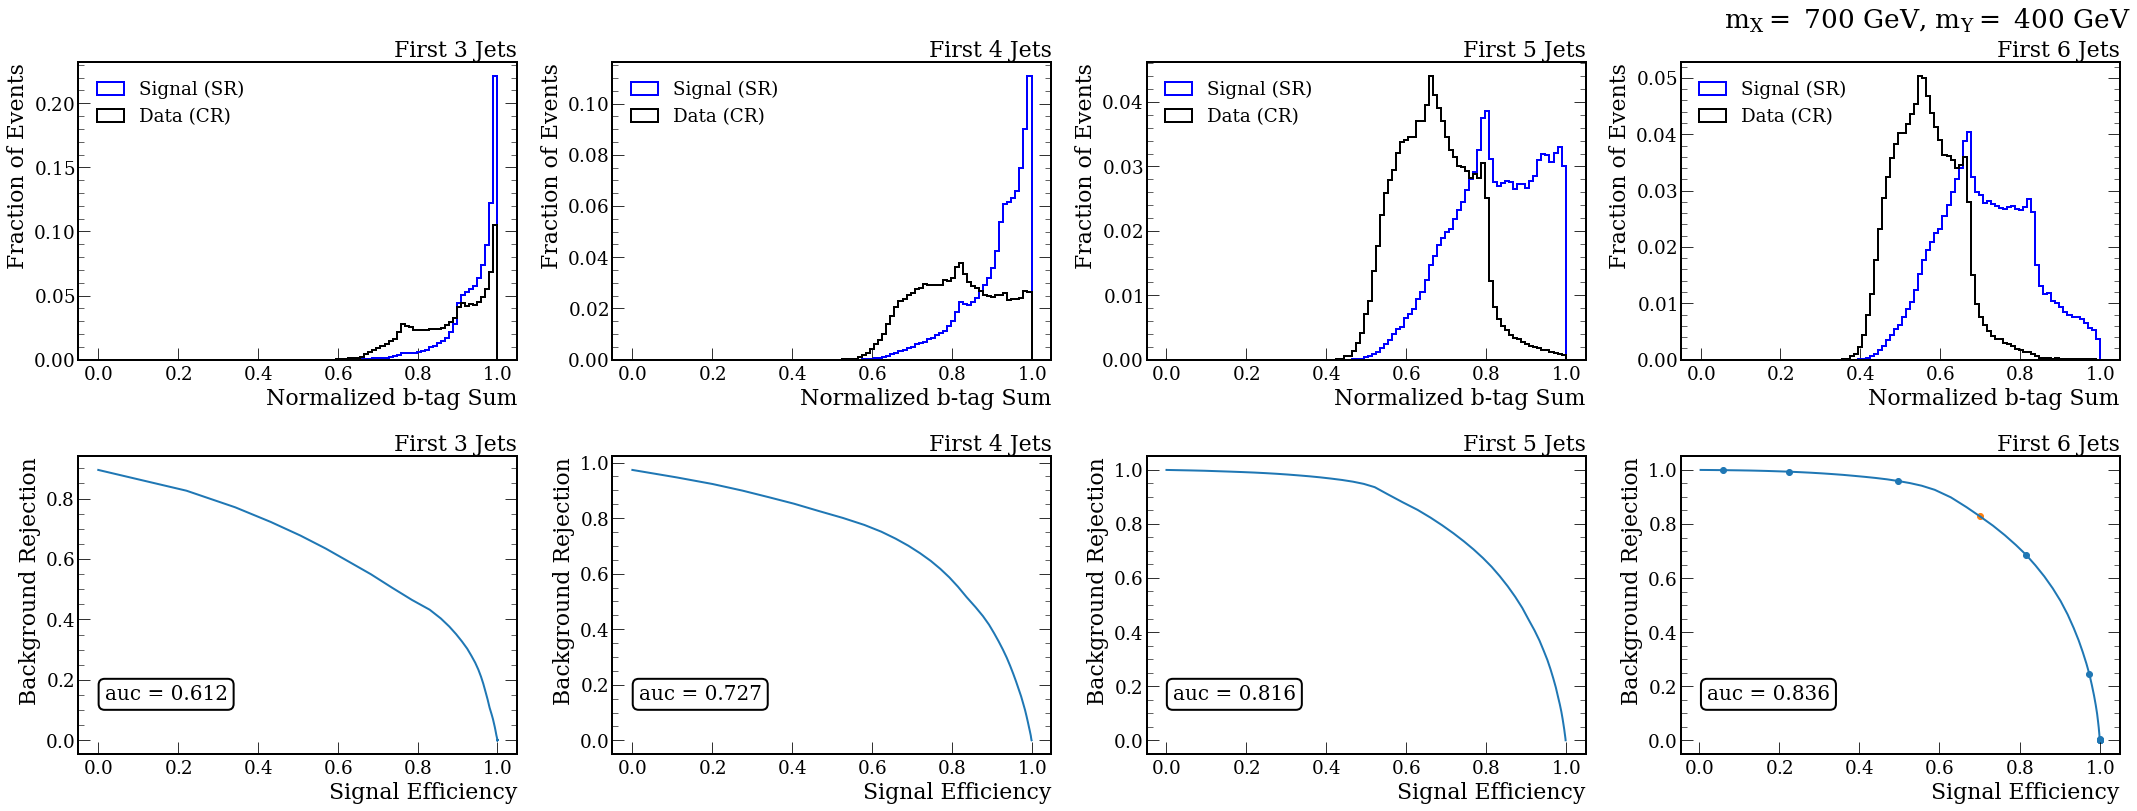

In [41]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(30,12))

fig.suptitle(signal_tree.sample, x=.9, y=.95)

bins = np.linspace(0,1,100)
ax = axs[0][0]
ax.set_title('First 3 Jets', loc='right')
n_s, edges = Hist(ak.sum(signal_tree.t6_jet_btag[:,:3], axis=1)[sr_sgnl_mask]/3, density=1, bins=b, ax=ax, label='Signal (SR)', color='blue')
n_data, edges = Hist(ak.sum(data_tree.t6_jet_btag[:,:3], axis=1)[cr_data_mask]/3, density=1, bins=b, ax=ax, label='Data (CR)', color='black')
ax.legend(fontsize='smaller', loc=2)
ax.set_xlabel(r'Normalized b-tag Sum')
ax.set_ylabel('Fraction of Events')
sum3_eff = []
sum3_rej = []
for cut in edges[:-1]:
    sum3_eff.append(n_s[edges[:-1] > cut].sum()/n_s.sum())
    sum3_rej.append(n_data[edges[:-1] < cut].sum()/n_data.sum())
sum3_eff = np.asarray(sum3_eff)
sum3_rej = np.asarray(sum3_rej)

ax = axs[0][1]
ax.set_title('First 4 Jets', loc='right')
n_s, edges = Hist(ak.sum(signal_tree.t6_jet_btag[:,:4], axis=1)[sr_sgnl_mask]/4, density=1, bins=b, ax=ax, label='Signal (SR)', color='blue')
n_data, edges = Hist(ak.sum(data_tree.t6_jet_btag[:,:4], axis=1)[cr_data_mask]/4, density=1, bins=b, ax=ax, label='Data (CR)', color='black')
ax.legend(fontsize='smaller', loc=2)
ax.set_xlabel(r'Normalized b-tag Sum')
ax.set_ylabel('Fraction of Events')
sum4_eff = []
sum4_rej = []
for cut in edges[:-1]:
    sum4_eff.append(n_s[edges[:-1] > cut].sum()/n_s.sum())
    sum4_rej.append(n_data[edges[:-1] < cut].sum()/n_data.sum())
sum4_eff = np.asarray(sum4_eff)
sum4_rej = np.asarray(sum4_rej)

ax = axs[0][2]
ax.set_title('First 5 Jets', loc='right')
n_s, edges = Hist(ak.sum(signal_tree.t6_jet_btag[:,:5], axis=1)[sr_sgnl_mask]/5, density=1, bins=b, ax=ax, label='Signal (SR)', color='blue')
n_data, edges = Hist(ak.sum(data_tree.t6_jet_btag[:,:5], axis=1)[cr_data_mask]/5, density=1, bins=b, ax=ax, label='Data (CR)', color='black')
ax.legend(fontsize='smaller', loc=2)
ax.set_xlabel(r'Normalized b-tag Sum')
ax.set_ylabel('Fraction of Events')
sum5_eff = []
sum5_rej = []
for cut in edges[:-1]:
    sum5_eff.append(n_s[edges[:-1] > cut].sum()/n_s.sum())
    sum5_rej.append(n_data[edges[:-1] < cut].sum()/n_data.sum())
sum5_eff = np.asarray(sum5_eff)
sum5_rej = np.asarray(sum5_rej)

ax = axs[0][3]
ax.set_title('First 6 Jets', loc='right')
n_s, edges = Hist(ak.sum(signal_tree.t6_jet_btag, axis=1)[sr_sgnl_mask]/6, density=1, bins=b, ax=ax, label='Signal (SR)', color='blue')
n_data, edges = Hist(ak.sum(data_tree.t6_jet_btag, axis=1)[cr_data_mask]/6, density=1, bins=b, ax=ax, label='Data (CR)', color='black')
ax.legend(fontsize='smaller', loc=2)
ax.set_xlabel(r'Normalized b-tag Sum')
ax.set_ylabel('Fraction of Events')
sum6_eff = []
sum6_rej = []
Sp = []
Se = []
for cut in edges[:-1]:
    sp = n_s[edges[:-1] >= cut].sum() / (n_s[edges[:-1] > cut].sum() + n_s[edges[:-1] < cut].sum())
    Sp.append(sp)
    se = n_data[edges[:-1] < cut].sum() / (n_data[edges[:-1] >= cut].sum() + n_data[edges[:-1] < cut].sum())
    Se.append(se)
    sum6_eff.append(n_s[edges[:-1] >= cut].sum()/n_s.sum())
    sum6_rej.append(n_data[edges[:-1] < cut].sum()/n_data.sum())
sum6_eff = np.asarray(sum6_eff)
sum6_rej = np.asarray(sum6_rej)
Sp = np.asarray(Sp)
Se = np.asarray(Se)


bins = np.linspace(0,1,100)
ax = axs[1][0]
ax.set_title('First 3 Jets', loc='right')
ax.plot(sum3_eff, sum3_rej, linewidth=2)
print(np.sum(sum3_rej*(edges[1:]-edges[:-1])))
ax.set_xlabel(r'Signal Efficiency')
ax.set_ylabel('Background Rejection')
dx = sum3_eff[:-1]-sum3_eff[1:]
auc = np.sum(sum3_rej[:-1]*dx)
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(0.2, 0.2, f"auc = {auc:.3f}", ha="center", va="center", transform=ax.transAxes,
            size=20,
            bbox=bbox_props)

ax = axs[1][1]
ax.set_title('First 4 Jets', loc='right')
ax.plot(sum4_eff, sum4_rej, linewidth=2)
ax.set_xlabel(r'Signal Efficiency')
ax.set_ylabel('Background Rejection')
dx = sum4_eff[:-1]-sum4_eff[1:]
auc = np.sum(sum4_rej[:-1]*dx)
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(0.2, 0.2, f"auc = {auc:.3f}", ha="center", va="center", transform=ax.transAxes,
            size=20,
            bbox=bbox_props)

ax = axs[1][2]
ax.set_title('First 5 Jets', loc='right')
ax.plot(sum5_eff, sum5_rej, linewidth=2)
ax.set_xlabel(r'Signal Efficiency')
ax.set_ylabel('Background Rejection')
dx = sum5_eff[:-1]-sum5_eff[1:]
auc = np.sum(sum5_rej[:-1]*dx)
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(0.2, 0.2, f"auc = {auc:.3f}", ha="center", va="center", transform=ax.transAxes,
            size=20,
            bbox=bbox_props)

ax = axs[1][3]
ax.set_title('First 6 Jets', loc='right')
ax.plot(sum6_eff, sum6_rej, linewidth=2)
ax.set_xlabel(r'Signal Efficiency')
ax.set_ylabel('Background Rejection')
dx = sum6_eff[:-1]-sum6_eff[1:]
auc = np.sum(sum6_rej[:-1]*dx)
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(0.2, 0.2, f"auc = {auc:.3f}", ha="center", va="center", transform=ax.transAxes,
            size=20,
            bbox=bbox_props)
ax.scatter(sum6_eff[::10], sum6_rej[::10])
ax.scatter(sum6_eff[64], sum6_rej[64])


plt.tight_layout()

fig.savefig('plots/sig_data_CR/btag_sum_roc.pdf')

In [40]:
score_bins[(abs(Se-auc)+abs(Sp-auc)).argmin()]

0.64

In [155]:
dx = sum3_eff[:-1]-sum3_eff[1:]
np.sum(sum3_rej[:-1]*dx)

0.612153325904664

In [103]:
bkgd_t6_pT1 = [pT[:,0][mask] for pT,mask in zip(bkgd_tree.t6_jet_pt, cr_bkgd_mask)]
bkgd_t6_pT2 = [pT[:,1][mask] for pT,mask in zip(bkgd_tree.t6_jet_pt, cr_bkgd_mask)]
bkgd_t6_pT3 = [pT[:,2][mask] for pT,mask in zip(bkgd_tree.t6_jet_pt, cr_bkgd_mask)]
bkgd_t6_pT4 = [pT[:,3][mask] for pT,mask in zip(bkgd_tree.t6_jet_pt, cr_bkgd_mask)]
bkgd_t6_pT5 = [pT[:,4][mask] for pT,mask in zip(bkgd_tree.t6_jet_pt, cr_bkgd_mask)]
bkgd_t6_pT6 = [pT[:,5][mask] for pT,mask in zip(bkgd_tree.t6_jet_pt, cr_bkgd_mask)]

In [104]:
from matplotlib import gridspec

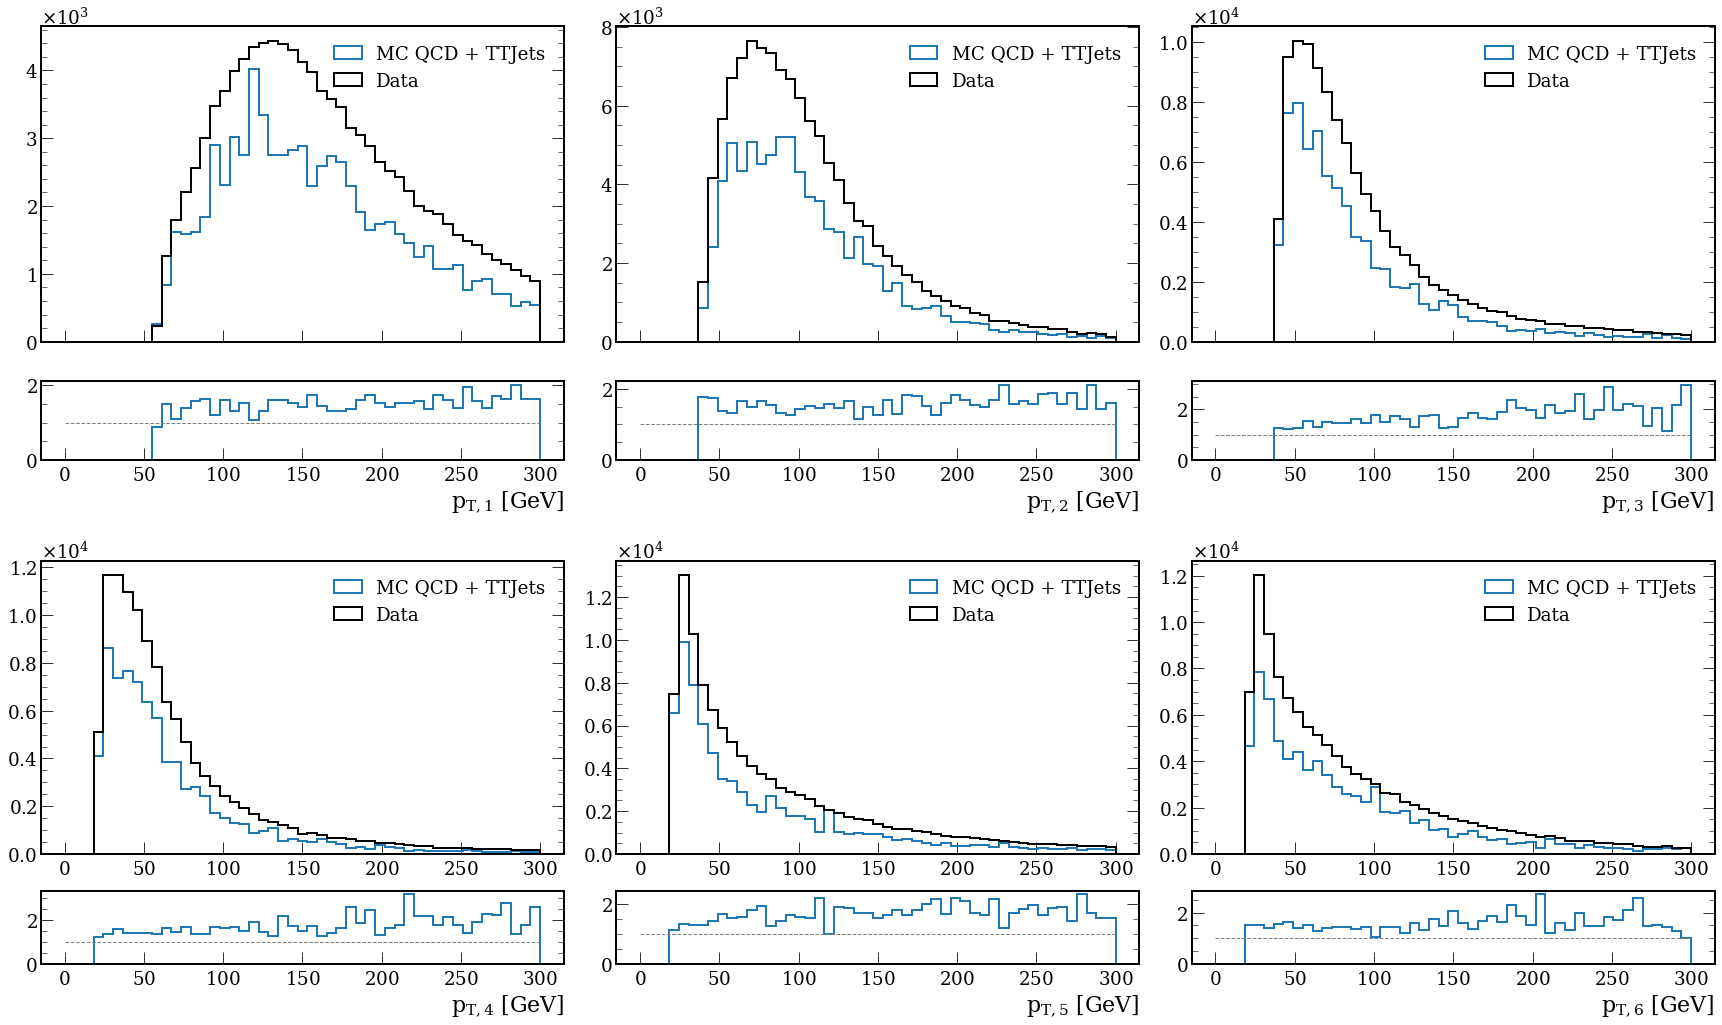

In [105]:
fig = plt.figure(figsize=(30,14))
spec1 = gridspec.GridSpec(nrows=2, ncols=3,
                         height_ratios=[4, 1])
spec1.update(top=0.98, bottom=0.55, wspace=0.1)
spec2 = gridspec.GridSpec(nrows=2, ncols=3,
                         height_ratios=[4, 1])
spec2.update(top=0.45, bottom=0.05, wspace=0.1)

ax = fig.add_subplot(spec1[0])
n, b, x = get_scaled_weights(bkgd_t6_pT1, bins=mH_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.t6_jet_pt[:,0][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller')
ax.xaxis.set_tick_params(labelbottom=False)

ax = fig.add_subplot(spec1[3], sharex=ax)
ax.plot([0,300],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=mH_bins, ax=ax)
ax.set_xlabel(r'$p_{T,1}$ [GeV]')

ax = fig.add_subplot(spec1[1])
n, b, x = get_scaled_weights(bkgd_t6_pT2, bins=mH_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.t6_jet_pt[:,1][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller')
ax.xaxis.set_tick_params(labelbottom=False)

ax = fig.add_subplot(spec1[4], sharex=ax)
ax.plot([0,300],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=mH_bins, ax=ax)
ax.set_xlabel(r'$p_{T,2}$ [GeV]')


ax = fig.add_subplot(spec1[2])
n, b, x = get_scaled_weights(bkgd_t6_pT3, bins=mH_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.t6_jet_pt[:,2][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller')
ax.xaxis.set_tick_params(labelbottom=False)

ax = fig.add_subplot(spec1[5], sharex=ax)
ax.plot([0,300],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=mH_bins, ax=ax)
ax.set_xlabel(r'$p_{T,3}$ [GeV]')


ax = fig.add_subplot(spec2[0])
n, b, x = get_scaled_weights(bkgd_t6_pT4, bins=mH_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.t6_jet_pt[:,3][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller')
ax = fig.add_subplot(spec2[3], sharex=ax)
ax.plot([0,300],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=mH_bins, ax=ax)
ax.set_xlabel(r'$p_{T,4}$ [GeV]')

ax = fig.add_subplot(spec2[1])
n, b, x = get_scaled_weights(bkgd_t6_pT5, bins=mH_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.t6_jet_pt[:,4][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller')
ax = fig.add_subplot(spec2[4], sharex=ax)
ax.plot([0,300],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=mH_bins, ax=ax)
ax.set_xlabel(r'$p_{T,5}$ [GeV]')

ax = fig.add_subplot(spec2[2])
n, b, x = get_scaled_weights(bkgd_t6_pT6, bins=mH_bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.t6_jet_pt[:,5][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller')
ax = fig.add_subplot(spec2[5], sharex=ax)
ax.plot([0,300],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=mH_bins, ax=ax)
ax.set_xlabel(r'$p_{T,6}$ [GeV]')

fig.savefig('plots/data_MCbkgd/pt_dist.pdf')

In [50]:
bkgd_t6_eta1 = [eta[:,0][mask] for eta,mask in zip(bkgd_tree.t6_jet_eta, cr_bkgd_mask)]
bkgd_t6_eta2 = [eta[:,1][mask] for eta,mask in zip(bkgd_tree.t6_jet_eta, cr_bkgd_mask)]
bkgd_t6_eta3 = [eta[:,2][mask] for eta,mask in zip(bkgd_tree.t6_jet_eta, cr_bkgd_mask)]
bkgd_t6_eta4 = [eta[:,3][mask] for eta,mask in zip(bkgd_tree.t6_jet_eta, cr_bkgd_mask)]
bkgd_t6_eta5 = [eta[:,4][mask] for eta,mask in zip(bkgd_tree.t6_jet_eta, cr_bkgd_mask)]
bkgd_t6_eta6 = [eta[:,5][mask] for eta,mask in zip(bkgd_tree.t6_jet_eta, cr_bkgd_mask)]

Text(1, 0, '$\\eta_{6}$')

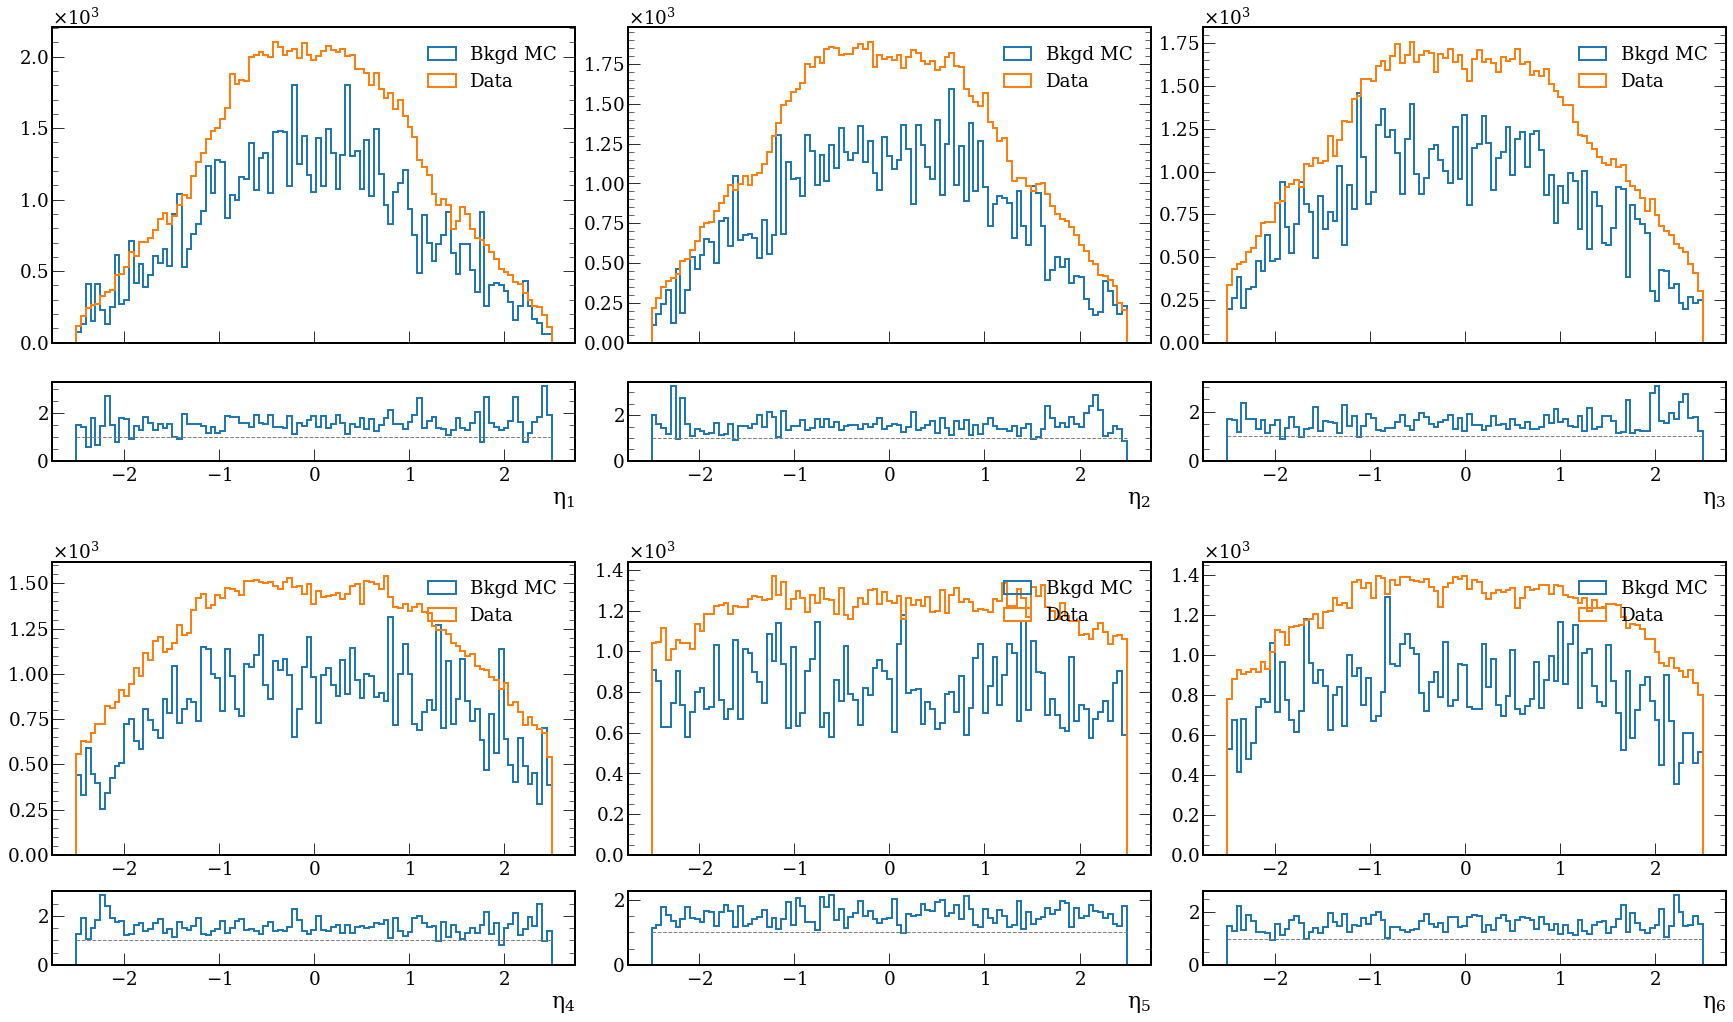

In [51]:
bins = np.linspace(-2.5,2.5,100)

fig = plt.figure(figsize=(30,14))
spec1 = gridspec.GridSpec(nrows=2, ncols=3,
                         height_ratios=[4, 1])
spec1.update(top=0.98, bottom=0.55, wspace=0.1)
spec2 = gridspec.GridSpec(nrows=2, ncols=3,
                         height_ratios=[4, 1])
spec2.update(top=0.45, bottom=0.05, wspace=0.1)

ax = fig.add_subplot(spec1[0])
n, b, x = get_scaled_weights(bkgd_t6_eta1, bins=bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.t6_jet_eta[:,0][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller')
ax.xaxis.set_tick_params(labelbottom=False)

ax = fig.add_subplot(spec1[3], sharex=ax)
ax.plot([-2.5,2.5],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=bins, ax=ax)
ax.set_xlabel(r'$\eta_{1}$')

ax = fig.add_subplot(spec1[1])
n, b, x = get_scaled_weights(bkgd_t6_eta2, bins=bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.t6_jet_eta[:,1][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller')
ax.xaxis.set_tick_params(labelbottom=False)

ax = fig.add_subplot(spec1[4], sharex=ax)
ax.plot([-2.5,2.5],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=bins, ax=ax)
ax.set_xlabel(r'$\eta_{2}$')


ax = fig.add_subplot(spec1[2])
n, b, x = get_scaled_weights(bkgd_t6_eta3, bins=bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.t6_jet_eta[:,2][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller')
ax.xaxis.set_tick_params(labelbottom=False)

ax = fig.add_subplot(spec1[5], sharex=ax)
ax.plot([-2.5,2.5],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=bins, ax=ax)
ax.set_xlabel(r'$\eta_{3}$')


ax = fig.add_subplot(spec2[0])
n, b, x = get_scaled_weights(bkgd_t6_eta4, bins=bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.t6_jet_eta[:,3][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller')
ax = fig.add_subplot(spec2[3], sharex=ax)
ax.plot([-2.5,2.5],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=bins, ax=ax)
ax.set_xlabel(r'$\eta_{4}$')

ax = fig.add_subplot(spec2[1])
n, b, x = get_scaled_weights(bkgd_t6_eta5, bins=bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.t6_jet_eta[:,4][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller')
ax = fig.add_subplot(spec2[4], sharex=ax)
ax.plot([-2.5,2.5],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=bins, ax=ax)
ax.set_xlabel(r'$\eta_{5}$')

ax = fig.add_subplot(spec2[2])
n, b, x = get_scaled_weights(bkgd_t6_eta6, bins=bins, scale=bkgd_tree.scale)
n_mc, edges = Hist(x, weights=n, bins=b, ax=ax, label='MC QCD + TTJets')
n_data, edges = Hist(data_tree.t6_jet_eta[:,5][cr_data_mask], bins=b, ax=ax, label='Data', color='black')
ax.legend(fontsize='smaller')
ax = fig.add_subplot(spec2[5], sharex=ax)
ax.plot([-2.5,2.5],[1,1], '--', color='grey', lw=1)
ratio = np.where(n_mc != 0, n_data/n_mc, 0)
n, edges = Hist(x, weights=ratio, bins=bins, ax=ax)
ax.set_xlabel(r'$\eta_{6}$')